In [166]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [167]:
from sklearn.manifold import TSNE

In [169]:
dataframe = pd.read_csv("DATA\Test_RiggingDataSet.csv")
dataframe.columns = ['x-axis','y-axis','z-axis','voltage','current','temperature','fault']

In [170]:
#if any data vaule is missing
dataframe.isnull().any().sum()

0

In [171]:
dataframe.head(-15)

x-axis  y-axis  z-axis  voltage  current  temperature        fault
0        9.17   10.14   -1.10  4.93164 -1.84755           40  Temperature
1       -5.64   -8.83   -2.87  4.94141 -1.58361           40  Temperature
2        3.26    8.37   -1.53  4.95117 -1.31968           47  Temperature
3       -5.70   -6.14    3.65  4.95117 -1.31968           47  Temperature
4        6.12    3.61    0.79  4.92187 -2.11149           47  Temperature
...       ...     ...     ...      ...      ...          ...          ...
23980   -3.59   -8.00    1.52  4.93164 -1.84755           26        Clean
23981    2.63    5.23    3.23  4.91211 -2.37542           26        Clean
23982    0.32   -2.33   -0.55  4.98047 -0.52787           26        Clean
23983    3.00    4.44    2.80  4.91211 -2.37542           26        Clean
23984    3.91    4.32   -0.86  4.95117 -1.31968           26        Clean

[23985 rows x 7 columns]

In [172]:
dataframe["current"] = dataframe["current"].abs()
dataframe = dataframe.drop(['voltage'], axis=1)
dataframe.head(10)

x-axis  y-axis  z-axis  current  temperature        fault
0    9.17   10.14   -1.10  1.84755           40  Temperature
1   -5.64   -8.83   -2.87  1.58361           40  Temperature
2    3.26    8.37   -1.53  1.31968           47  Temperature
3   -5.70   -6.14    3.65  1.31968           47  Temperature
4    6.12    3.61    0.79  2.11149           47  Temperature
5   -1.31   -1.81   -2.93  2.11149           47  Temperature
6   -1.74    0.14    1.03  1.31968           47  Temperature
7    4.48    2.15    7.07  1.58361           47  Temperature
8   -4.06   -7.48    0.67  2.63936           47  Temperature
9    3.81    5.56   -2.26  1.05574           47  Temperature

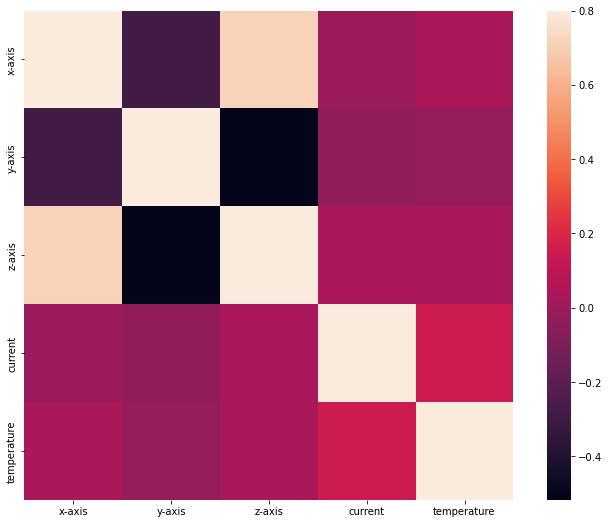

In [173]:
# heat map of correlation of features
correlation_matrix = dataframe.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [174]:
classes_orig = dataframe['fault']
classes_orig = classes_orig.to_numpy()
classes_orig.reshape(-1,)
unique_classes = np.unique(classes_orig)
print('unique labels',unique_classes)

# ENCODING + catogarizing classes acccording to their unique labels  
classes = pd.Categorical(classes_orig, categories=unique_classes).codes
#classes.reshape(225,-1)
print(classes)
print(classes.shape)

unique labels ['Clean' 'Temperature' 'Vibrational']
[1 1 1 ... 0 0 0]
(24000,)


In [175]:
tsne_res = TSNE(n_components=2,random_state=4).fit_transform(data.iloc[:,0:4])
plt.figure(figsize=(10,6))
sns.scatterplot(
        x=tsne_res[:,0], y= tsne_res[:,1],
        hue=classes_orig,
        palette=sns.color_palette("Paired",3),
        data=pd.DataFrame(tsne_res))
plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

NameError: name 'data' is not defined

In [176]:
data_1 = dataframe[["x-axis", "y-axis","z-axis","current","temperature"]]
#scaler = MinMaxScaler(feature_range=(-50,50))
#data_1 = scaler.fit_transform(data)
data_1 = data_1.to_numpy()
#data_1 = data_1.reshape(-1,20,20)
print("Data shape ",data_1.shape)
print(data_1)


Data shape  (24000, 5)
[[ 9.17    10.14    -1.1      1.84755 40.     ]
 [-5.64    -8.83    -2.87     1.58361 40.     ]
 [ 3.26     8.37    -1.53     1.31968 47.     ]
 ...
 [-1.21    -4.1      1.34     1.05574 26.     ]
 [-0.9     -4.83     1.28     1.05574 26.     ]
 [-0.9     -4.05     1.28     1.05574 26.     ]]


In [178]:
data_train, data_test, classes_train, classes_test = train_test_split(data_1,classes, test_size=0.30, random_state=780,stratify=classes)

#for cross validation check dividing training data again

data_train, data_valid, classes_train, classes_valid = train_test_split(data_train,classes_train, test_size=0.30, random_state=410,stratify=classes_train)

In [179]:
print(data_test.shape)
print(data_train.shape)
print(classes_train.shape)
print(classes_test.shape)

(7200, 5)
(11760, 5)
(11760,)
(7200,)


In [180]:
# reshaping data
data_train = data_train.reshape(-1,5,1)
data_test = data_test.reshape(-1,5,1)
data_valid = data_valid.reshape(-1,5,1)

from keras.utils import to_categorical
classes_train = to_categorical(classes_train)
classes_train = classes_train.reshape(-1,3)
classes_test = to_categorical(classes_test)
classes_test = classes_test.reshape(-1,3)
classes_valid = to_categorical(classes_valid)
classes_valid = classes_valid.reshape(-1,3)
# Shuffling our data
index = np.random.permutation(len(data_train))
data_train = data_train[index]
classes_train =  classes_train[index]

print('training data shape: ', data_train.shape)
print('validation data shape: ', data_valid.shape)
print('testing data shape: ', data_test.shape)
print('training classes shape: ', classes_train.shape)
print('validation classes shape: ', classes_valid.shape)
print('testing classes shape: ', classes_test.shape)


training data shape:  (11760, 5, 1)
validation data shape:  (5040, 5, 1)
testing data shape:  (7200, 5, 1)
training classes shape:  (11760, 3)
validation classes shape:  (5040, 3)
testing classes shape:  (7200, 3)


In [181]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Conv1D, MaxPooling1D, Flatten

In [182]:
model = Sequential()
model.add(Conv1D(filters=98, kernel_size=1, activation='relu', input_shape = (5,1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=1, activation='relu'))
#model.add(Dropout(0.05))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 5, 98)             196       
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 5, 98)             0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 5, 128)            12672     
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 640)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 120)               76920     
_________________________________________________________________
dense_43 (Dense)             (None, 80)              

In [183]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
N_Network = model.fit(data_train , classes_train, epochs=30, batch_size=128, validation_data=(data_valid, classes_valid)) 

Epoch 1/30
92/92 [==============================] - 1s 10ms/step - loss: 0.5837 - accuracy: 0.7394 - val_loss: 0.3421 - val_accuracy: 0.8933
Epoch 2/30
92/92 [==============================] - 1s 12ms/step - loss: 0.1852 - accuracy: 0.9389 - val_loss: 0.1102 - val_accuracy: 0.9649
Epoch 3/30
92/92 [==============================] - 1s 7ms/step - loss: 0.1003 - accuracy: 0.9656 - val_loss: 0.0815 - val_accuracy: 0.9742
Epoch 4/30
92/92 [==============================] - 1s 7ms/step - loss: 0.0777 - accuracy: 0.9743 - val_loss: 0.0642 - val_accuracy: 0.9784
Epoch 5/30
92/92 [==============================] - 1s 10ms/step - loss: 0.0816 - accuracy: 0.9698 - val_loss: 0.0789 - val_accuracy: 0.9700
Epoch 6/30
92/92 [==============================] - 1s 8ms/step - loss: 0.0685 - accuracy: 0.9766 - val_loss: 0.0523 - val_accuracy: 0.9843
Epoch 7/30
92/92 [==============================] - 1s 9ms/step - loss: 0.0652 - accuracy: 0.9786 - val_loss: 0.0800 - val_accuracy: 0.9710
Epoch 8/30
92/92 

In [184]:

import time

start = time.time()
model.evaluate(data_test,classes_test, batch_size = 128, verbose = 0)
end = time.time()
print(end - start)


0.18404769897460938


In [185]:
model.evaluate(data_test,classes_test, batch_size = 64, verbose = 2)

113/113 - 0s - loss: 0.0537 - accuracy: 0.9819


[0.05374203249812126, 0.9819444417953491]

In [186]:
prediction = model.predict(data_test)
prediction_classes = list([])
for each_prediction in prediction:
    prediction_classes.append(list(each_prediction).index(max(each_prediction)))

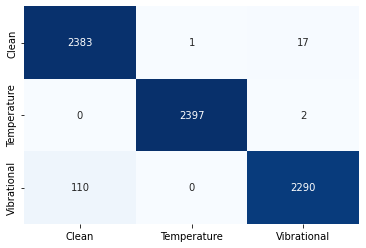

In [187]:
from sklearn.metrics import confusion_matrix
true_classes = np.argmax(classes_test, axis = 1)
matrix = confusion_matrix(true_classes, prediction_classes)

import seaborn as sns
matrix = pd.DataFrame(matrix)
plt.figure()
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = unique_classes,
           yticklabels = unique_classes, cmap = "Blues", cbar = False)
plt.xticks()
plt.show()

In [188]:
model.save("test_rigging.h5")

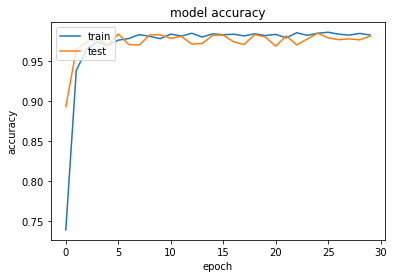

In [189]:
plt.plot(N_Network.history['accuracy'])
plt.plot(N_Network.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

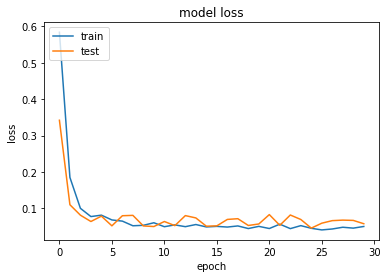

In [190]:
# summarize history for loss
plt.plot(N_Network.history['loss'])
plt.plot(N_Network.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [193]:
classes = ['Clean', 'Temprature', 'Vibrational']
yhat = np.argmax(model.predict(data_test[14:15]), axis=-1)
    # plot baseline and predictions
print(yhat)
print(data_test[14:15])
print(classes[yhat[0]])


[2]
[[[ -8.75   ]
  [ 18.56   ]
  [-45.22   ]
  [  1.31968]
  [ 31.     ]]]
Vibrational


In [194]:
data_1



array([[ 9.17   , 10.14   , -1.1    ,  1.84755, 40.     ],
       [-5.64   , -8.83   , -2.87   ,  1.58361, 40.     ],
       [ 3.26   ,  8.37   , -1.53   ,  1.31968, 47.     ],
       ...,
       [-1.21   , -4.1    ,  1.34   ,  1.05574, 26.     ],
       [-0.9    , -4.83   ,  1.28   ,  1.05574, 26.     ],
       [-0.9    , -4.05   ,  1.28   ,  1.05574, 26.     ]])